#### Notebook destinado ao tratamento da base de dados para utilizar na Visualização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('olympic_results.csv')

In [3]:
df_ouro = df[df['medal_type'] == 'GOLD'].copy()

In [4]:
# extraindo o ano de cada olimpiada
df['ano'] = df['slug_game'].str[-4:].astype(int)
df = df.dropna(subset=['ano'])

anos = np.arange(1850, 2018, 1)

df = df[df['ano'].isin(anos)]

In [5]:
df_atletismo_tempo =  df[(df['discipline_title'] == 'Athletics') & (df['value_type'] == 'TIME')]
df_atletismo_distancia =  df[(df['discipline_title'] == 'Athletics') & (df['value_type'] == 'DISTANCE')]
df_peso =  df[(df['discipline_title'] == 'Weightlifting') & (df['value_type'] == 'WEIGHT')]

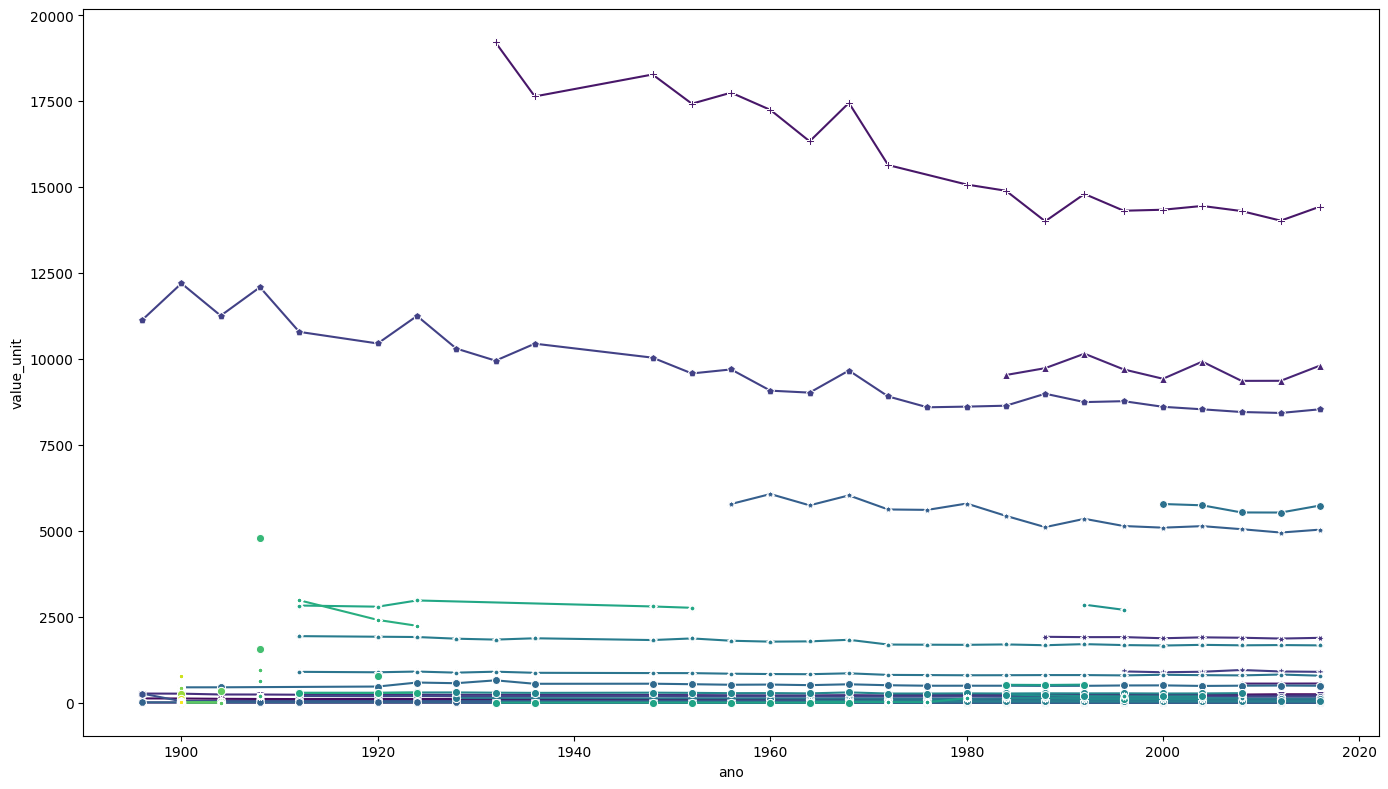

In [6]:
df_corridas = df_atletismo_tempo.copy()

rename_tempo = {
    '1500m women': '1500m Feminino',
    '800m men': '800m Masculino',
    '100m men': '100m Masculino',
    '50km walk men': 'Marcha Atlética 50km Masculino',
    '4x400m relay women': 'Revezamento 4x400m Feminino',
    '3000m steeplechase women': '3000m com Obstáculos Feminino',
    'marathon women': 'Maratona Feminina',
    '100m hurdles women': '100m com Barreiras Feminino',
    '1500m men': '1500m Masculino',
    '10000m women': '10000m Feminino',
    '200m men': '200m Masculino',
    '5000m women': '5000m Feminino',
    'marathon men': 'Maratona Masculina',
    '400m hurdles men': '400m com Barreiras Masculino',
    '4x400m relay men': 'Revezamento 4x400m Masculino',
    '4x100m relay women': 'Revezamento 4x100m Feminino',
    '400m men': '400m Masculino',
    '100m women': '100m Feminino',
    '4x100m relay men': 'Revezamento 4x100m Masculino',
    '20km walk men': 'Marcha Atlética 20km Masculino',
    '110m hurdles men': '110m com Barreiras Masculino',
    '400m hurdles women': '400m com Barreiras Feminino',
    '3000m steeplechase men': '3000m com Obstáculos Masculino',
    '200m women': '200m Feminino',
    '20km race walk women': 'Marcha Atlética 20km Feminino',
    '5000m men': '5000m Masculino',
    '800m women': '800m Feminino',
    '10000m men': '10000m Masculino',
    '400m women': '400m Feminino',
    'heptathlon women': 'Heptatlo Feminino',
    'decathlon men': 'Decatlo Masculino',
    '10000m walk women': 'Marcha Atlética 10000m Feminino',
    '3000m women': '3000m Feminino',
    'pentathlon women': 'Pentatlo Feminino',
    '80m hurdles women': '80m com Barreiras Feminino',
    '10000m walk men': 'Marcha Atlética 10000m Masculino',
    'pentathlon men': 'Pentatlo Masculino',
    'cross country individual men': 'Cross Country Individual Masculino',
    '3000m walk men': 'Marcha Atlética 3000m Masculino',
    '1,600 metres Medley Relay Men': 'Revezamento Medley 1600m Masculino',
    '10miles walk 1609m men': 'Marcha Atlética 10 Milhas (1609m) Masculino',
    '3200m steeplechase men': '3200m com Obstáculos Masculino',
    '5 miles 8047m men': '5 Milhas (8047m) Masculino',
    '3500m walk men': 'Marcha Atlética 3500m Masculino',
    '200m hurdles men': '200m com Barreiras Masculino',
    '60m men': '60m Masculino',
    'All-Around Championship Men': 'Campeonato All-Around Masculino',
    '4000m steeplechase men': '4000m com Obstáculos Masculino'
}

def converter_tempo(valor):
    try:
        # tempo no formato 9000 = 9 seg
        if isinstance(valor, (int, float)) or (isinstance(valor, str) and ':' not in valor):
            return float(valor) / 1000
        
        # tempo no formato minuto:segundo:centesimo
        elif ':' in valor:
            partes = valor.split(':')
            if len(partes) == 2: 
                minutos = float(partes[0])
                segundos = float(partes[1])
                return minutos * 60 + segundos
            
    except (ValueError, TypeError, AttributeError):
        pass 
    
    return np.nan

df_corridas['value_unit'] = df_corridas['value_unit'].apply(converter_tempo)
df_corridas['value_unit'] = df_corridas.groupby('event_title')['value_unit'].bfill().ffill()
df_corridas['event_title'] = df_corridas['event_title'].replace(rename_tempo)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_corridas,
    x='ano',
    y='value_unit',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,     
    legend=False,    
    palette='viridis'   
)

plt.tight_layout()
plt.show()

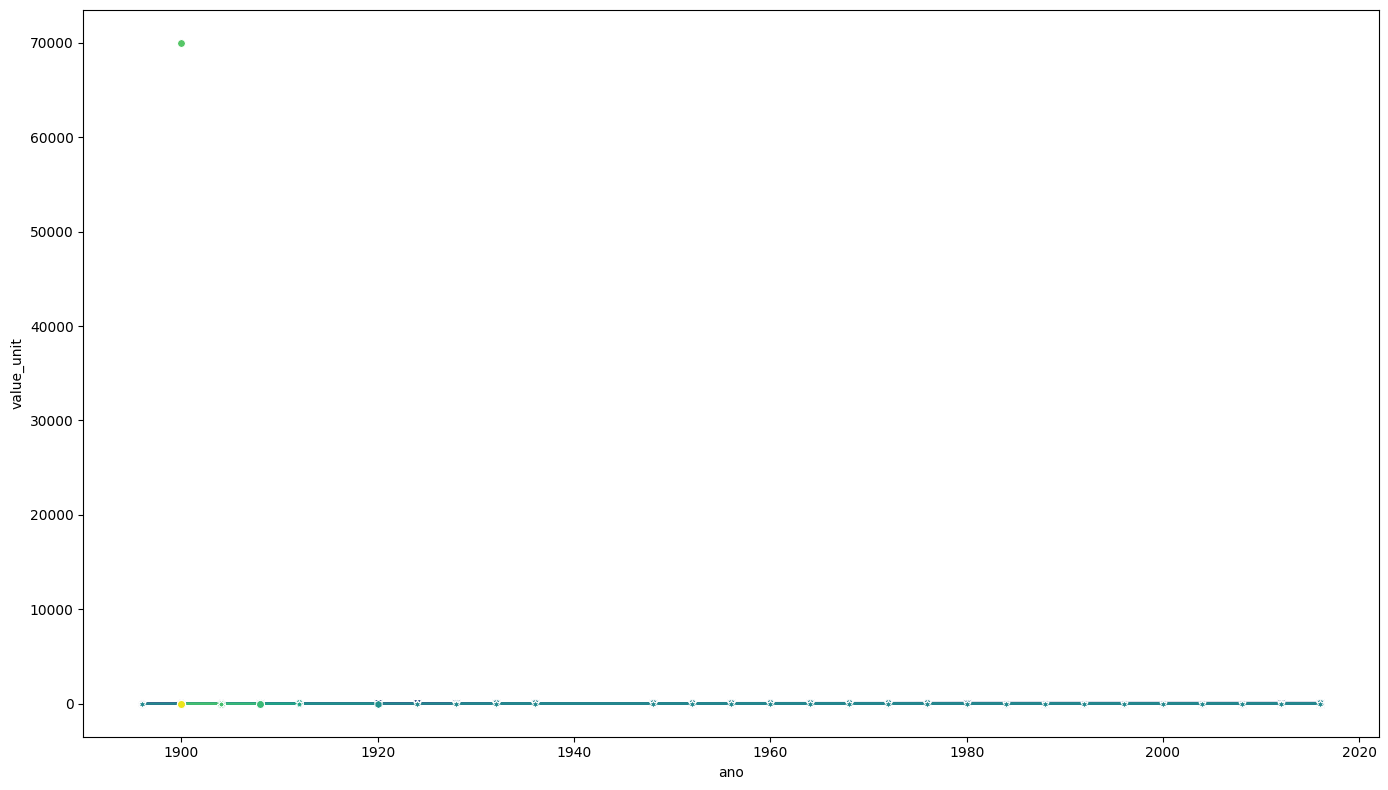

In [7]:
df_distancias = df_atletismo_distancia.copy()

rename_dist = {
    'hammer throw men': 'Lançamento de Martelo Masculino',
    'high jump men': 'Salto em Altura Masculino',
    'hammer throw women': 'Lançamento de Martelo Feminino',
    'pole vault men': 'Salto com Vara Masculino',
    'discus throw men': 'Lançamento de Disco Masculino',
    'pole vault women': 'Salto com Vara Feminino',
    'shot put women': 'Arremesso de Peso Feminino',
    'shot put men': 'Arremesso de Peso Masculino',
    'javelin throw men': 'Lançamento de Dardo Masculino',
    'triple jump women': 'Salto Triplo Feminino',
    'long jump women': 'Salto em Distância Feminino',
    'triple jump men': 'Salto Triplo Masculino',
    'discus throw women': 'Lançamento de Disco Feminino',
    'high jump women': 'Salto em Altura Feminino',
    'javelin throw women': 'Lançamento de Dardo Feminino',
    'long jump men': 'Salto em Distância Masculino',
    '56lb weight throw 254kg men': 'Arremesso de Peso de 56lb (25.4kg) Masculino',
    'javelin throw both hands men': 'Lançamento de Dardo Ambas as Mãos Masculino',
    'shot put both hands men': 'Arremesso de Peso Ambas as Mãos Masculino',
    'long jump standing men': 'Salto em Distância sem Impulsão Masculino',
    'discus throw ancient style men': 'Lançamento de Disco Estilo Antigo Masculino',
    'javelin throw freestyle men': 'Lançamento de Dardo Estilo Livre Masculino',
    'high jump standing men': 'Salto em Altura sem Impulsão Masculino',
    'triple jump standing men': 'Salto Triplo sem Impulsão Masculino'
}

def converter_dist(valor):
    try:
        return float(valor)
    except (ValueError, TypeError):
        return np.nan

df_distancias['value_unit'] = df_atletismo_distancia['value_unit'].apply(converter_dist)
df_distancias['value_unit'] = df_distancias.groupby('event_title')['value_unit'].bfill().ffill()
df_distancias['event_title'] = df_distancias['event_title'].replace(rename_dist)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_distancias,
    x='ano',
    y='value_unit',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,    
    legend=False,     
    palette='viridis'   
)

plt.tight_layout()
plt.show()

In [8]:
df_peso['event_title'].unique()

array(['75kg women', '63kg women', '105kg heavyweight men',
       '-56kg (bantamweight) men', '53kg women', '85kg men',
       '62kg featherweight men', '+105kg men', '94kg men', '69kg women',
       '+75kg women', '69kg men', '58kg women', '77kg men', '48kg women',
       '105kg superheavyweight men', '56kg bantamweight men', '56kg men',
       '99  108kg heavyweight men', '91 - 99kg (first-heavyweight) men',
       '64  70kg lightweight men', '70  76kg middleweight men',
       '54kg flyweight men', '83 - 91kg middle-heavyweight men',
       '59  64kg featherweight men', '108kg super heavyweight men',
       '54  59kg bantamweight men', '76  83kg lightheavyweight men',
       '60-67.5kg lightweight men',
       '82.5 - 90kg (middle-heavyweight) men',
       '90  100kg firstheavyweight men', '52kg flyweight men',
       '75  825kg lightheavyweight men', '56 - 60kg (featherweight) men',
       '110kg super heavyweight men', '67.5-75kg middleweight men',
       '100  110kg heavyweight 

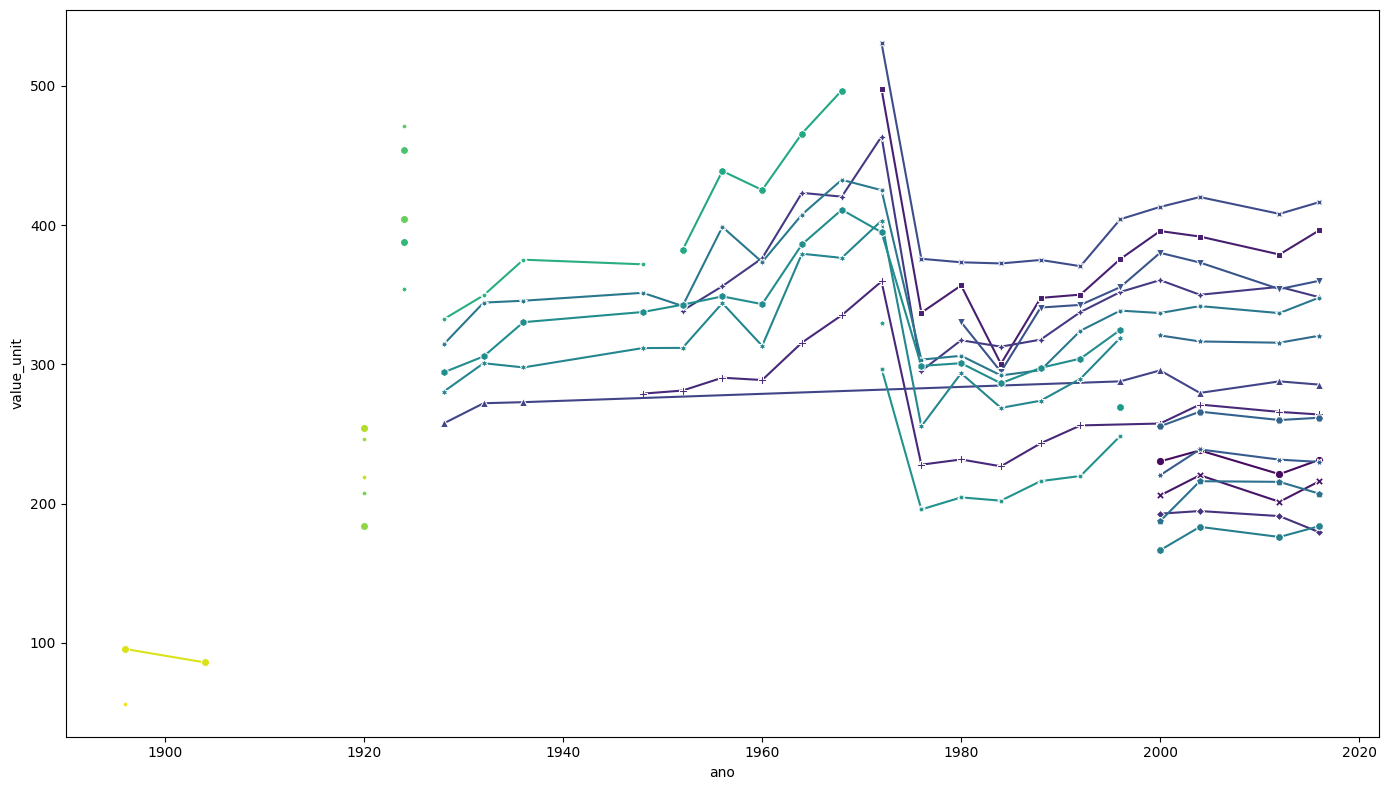

In [9]:
df_pesos = df_peso.copy()

remover = [
    '675  75kg onetwo hand 5 events middleweight men',
    '675  75kg onetwo hand 3 events middleweight men',
    '60kg onetwo hand 5 events featherweight men',
    '60kg onetwo hand 3 events featherweight men',
    '75  825kg onetwo hand 5 e lightheavyweight men',
    '75  825kg onetwo hand 3 e lightheavyweight men',
    '825kg onetwo hand 5 events heavyweight men',
    '825kg onetwo hand 3 events heavyweight men',
    '60  675kg onetwo hand 5 events lightweight men',
    '60  675kg onetwo hand 3 events lightweight men',
    'heavyweight - two hand lift men',
    'heavyweight - one hand lift men'
]

df_pesos = df_pesos.drop(columns=remover, errors='ignore')  

rename_peso = {
    '75kg women': '75kg - Feminino',
    '63kg women': '63kg - Feminino',
    '53kg women': '53kg - Feminino',
    '69kg women': '69kg - Feminino',
    '+75kg women': '+75kg - Feminino',
    '58kg women': '58kg - Feminino',
    '48kg women': '48kg - Feminino',
    
    '54kg flyweight men': '52-56kg Peso Mosca - Masculino',
    '52kg flyweight men': '52-56kg Peso Mosca - Masculino',
    '- 52kg (flyweight) men': '52-56kg Peso Mosca - Masculino',
    
    '-56kg (bantamweight) men': '56-60kg Peso Galo - Masculino',
    '56kg bantamweight men': '56-60kg Peso Galo - Masculino',
    '56kg men': '56-60kg Peso Galo - Masculino',
    '52  56kg bantamweight men': '52-56kg Peso Galo - Masculino',
    '54  59kg bantamweight men': '54-59kg Peso Galo - Masculino',
    
    '56 - 60kg (featherweight) men': '56-60kg Peso Galo - Masculino',
    
    '62kg featherweight men': '60-67.5kg Peso Pena - Masculino',
    '60kg featherweight men': '60-67.5kg Peso Pena - Masculino',
    '59  64kg featherweight men': '60-67.5kg Peso Pena - Masculino',
    
    '64  70kg lightweight men': '60-67.5kg Peso Leve - Masculino',
    '60-67.5kg lightweight men': '60-67.5kg Peso Leve - Masculino',
    '60 - 67.5kg (lightweight) men': '60-67.5kg Peso Leve - Masculino',
    
    '70  76kg middleweight men': '67.5-75kg Peso Médio - Masculino',
    '67.5-75kg middleweight men': '67.5-75kg Peso Médio - Masculino',
    '67.5 - 75kg, (middleweight) men': '67.5-75kg Peso Médio - Masculino',
    
    '77kg men': '75-82.5kg Meio-Pesado - Masculino',
    '75  825kg lightheavyweight men': '75-82.5kg Meio-Pesado - Masculino',
    '75-82.5kg total lightheavyweight men': '75-82.5kg Meio-Pesado - Masculino',
    '76  83kg lightheavyweight men': '75-82.5kg Meio-Pesado - Masculino',
    
    '83 - 91kg middle-heavyweight men': '82.5-90kg Médio-Pesado - Masculino',
    '82.5 - 90kg (middle-heavyweight) men': '82.5-90kg Médio-Pesado - Masculino',
    '825  90kg middleheavyweight men': '82.5-90kg Médio-Pesado - Masculino',
    '825  90kg total middleheavyweight men': '82.5-90kg Médio-Pesado - Masculino',
    '85kg men': '82.5-90kg Médio-Pesado - Masculino',
    
    '91 - 99kg (first-heavyweight) men': '90-100kg Primeiro-Pesado - Masculino',
    '90  100kg firstheavyweight men': '90-100kg Primeiro-Pesado - Masculino',
    '90 - 100kg (first-heavyweight) men': '90-100kg Primeiro-Pesado - Masculino',
    '94kg men': '90-100kg Primeiro-Pesado - Masculino',
    
    '105kg heavyweight men': '100-110kg Peso Pesado - Masculino',
    '99  108kg heavyweight men': '100-110kg Peso Pesado - Masculino',
    '100  110kg heavyweight men': '100-110kg Peso Pesado - Masculino',
    '91  110kg heavyweight men': '100-110kg Peso Pesado - Masculino',
    
    '90kg heavyweight men': '90-100kg Peso Pesado - Masculino',

    '82.5kg heavyweight men': '82.5-90kg Peso Pesado - Masculino',
    
    '105kg superheavyweight men': '+105kg Superpesado - Masculino',
    '108kg super heavyweight men': '+105kg Superpesado - Masculino',
    '110kg super heavyweight men': '+105kg Superpesado - Masculino',
    '+105kg men': '+105kg Superpesado - Masculino',
}

def converter_peso(valor):
    try:
        return float(valor)
    except (ValueError, TypeError):
        return np.nan

df_pesos['value_unit'] = df_peso['value_unit'].apply(converter_peso)
df_pesos['value_unit'] = df_pesos.groupby('event_title')['value_unit'].bfill().ffill()
df_pesos['event_title'] = df_pesos['event_title'].replace(rename_peso)

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df_pesos,
    x='ano',
    y='value_unit',
    hue='event_title',  
    style='event_title', 
    markers=True,     
    dashes=False,      
    errorbar=None,         
    legend=False,
    palette='viridis'   
)

plt.tight_layout()
plt.show()

In [10]:
df_final = pd.concat([df_corridas, df_distancias, df_pesos], ignore_index=True)

df_gold = df_final[df_final['medal_type'] == 'GOLD'].copy()

df_gold.to_csv('df_processed.csv', index=False)
df_final.to_csv('df_all.csv', index=False)